# Problem Description

In this notebook, we explore the Service Inventory data provided by the Government of Canada on Open Government [website](https://open.canada.ca/data/en/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c).

# Obtaining Data

## Importing Libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Datasets

In [2]:
url_inv = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/3acf79c0-a5f5-4d9a-a30d-fb5ceba4b60a/download/service_inventory.csv"
url_std = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/272143a7-533e-42a1-b72d-622116474a21/download/service_standards.csv"

In [3]:
df_inv = pd.read_csv(url_inv)
df_std = pd.read_csv(url_std)

## Exploring Datasets: Service Identification Information & Metrics (2016-2019)

In [4]:
df_inv.head()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr
0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,"prior,crit",Provides financial counselling and mediation s...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The use of""NA"" in the SIN column is an indica...",NaN
1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding for the development of nation...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding to industry associations and ...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides support for pre-commercialization Res...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides repayable contributions to approved i...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN


In [10]:
df_inv.shape

(1865, 37)

In [11]:
# really dirty; might want to ignore it

inv_unique_program_names = df_inv.program_name_en.unique()
print("Number of unique program names:", inv_unique_program_names.size)
inv_unique_program_names

Number of unique program names: 661


array(['Farm Debt Mediation Service', 'AgriMarketing', 'AgriInnovation',
       'AgriInvest', 'AgriStability', 'Market Information and Analysis',
       'AgriRisk Initiatives', 'Career Focus Program',
       'AgriCompetitiveness',
       'Career Focus Program (AYGJI is an initiaitve under te borader YES Career Focus program)',
       'Canadian Agricultural Adaptation Program',
       'Agricultural Greenhouse Gases', 'International Trade Shows',
       'Market Intelligence and Information Services',
       'Market Access Services', 'Canada Brand and Market Development',
       "Agriculture and Agri-Food Canada Food Research and Development Centre's Industrial Program",
       'Office of Intellectual Properities and Commercialization',
       'Drought Watch', 'Canadian Soil Information System',
       'Geospatial Products', 'ATIP',
       'Churchill Port Utilization Program',
       '  Admissibility Determination', 'Admissibility Determination',
       ' Admissibility Determination', 'Tr

In [6]:
inv_unique_department_names = df_inv.department_name_en.unique()
print("Number of unique department names:", inv_unique_department_names.size)
inv_unique_department_names

Number of unique department names: 67


array(['Agriculture and Agri-Food Canada',
       'Canada Border Services Agency', 'Canadian Food Inspection Agency',
       'Immigration, Refugees and Citizenship Canada',
       'Canada Revenue Agency', 'Canada School of Public Service',
       'Employment and Social Development Canada',
       'Innovation, Science and Economic Development Canada',
       'Public Services and Procurement Canada', 'Shared Services Canada',
       'Veterans Affairs Canada', 'Fisheries and Oceans Canada',
       'Crown-Indigenous Relations and Northern Affairs Canada',
       'Transport Canada', 'Public Health Agency of Canada',
       'Office of the Superintendent of Financial Institutions Canada',
       'Department of Indigenous Services', 'Public Safety Canada',
       'Global Affairs Canada', 'Western Economic Diversification Canada',
       'The National Battlefields Commission',
       'Immigration and Refugee Board of Canada', 'Health Canada',
       'Environment and Climate Change Canada',
    

In [12]:
inv_uique_service_names = df_inv.service_name_en.unique()
print("Number of unique service names:", inv_uique_service_names.size)
inv_uique_service_names

Number of unique service names: 1337


array(['Farm Debt Mediation Service',
       'AgriMarketing Program Assurance Systems',
       'AgriMarketing Program Market Development', ...,
       'ATIP Compliance Services',
       'Calibration laboratory assessment service',
       'Instrument Calibration Services'], dtype=object)

In [8]:
df_inv.service_type.unique()

array(['res', 'adv', 'reg', 'legal', 'hr', 'ecu', 'acq', 'its', 'fm',
       'im', 'rule', 'comm', 'mat', 'mgnt', 'reg_vol', 'ecu,reg',
       'adv,reg', 'adv,ecu', 'gnc', 'adv,mgnt', 'adv,comm', 'its,mgnt',
       'mgnt,adv', 'mgnt,mat', 'rule,legal', 'reg_vol,reg', 'reg,ecu',
       'res,gnc', 'prop', 'reg,comm', 'reg,reg_vol', 'gnc,res', 'ecu,adv',
       'im,hr', 'mgnt,res', 'mgnt,reg', 'adv,hr', 'im,adv', 'adv,gnc',
       'reg,adv', 'rule,reg', 'adv,fm', 'res,reg', 'adv,res', 'reg,res',
       'gnc,fm', 'im,its', 'im,comm', 'mgnt,ecu', 'legal,comm',
       'its,comm', 'its,reg', 'reg,hr', 'comm,adv', 'reg,gnc', 'gnc,ecu',
       'mgnt,prop', 'ecu,gnc', 'reg,its', 'hr,reg', 'im,ecu', 'mgnt,hr',
       'comm,reg', 'adv,prop', 'mgnt,fm', 'comm,res', 'adv,legal',
       'reg,prop', 'fm,gnc', 'its,res', 'acq,adv', 'res,prop',
       'reg_vol,adv', 'mat,res'], dtype=object)

In [13]:
df_inv.client_target_groups.unique()

array(['econom', 'NGO', 'person', 'econom,person', 'intern_gov',
       'intern_gov,person', 'PTC', 'intern_gov,person,PTC',
       'econom,intern_gov,NGO,PTC', 'econom,NGO,person,PTC',
       'econom,for,NGO', 'econom,for,intern_gov,NGO,person,PTC',
       'econom,NGO,person', 'econom,NGO', 'econom,for,NGO,person,PTC',
       'econom,NGO,PTC', 'NGO,PTC', 'econom,intern_gov',
       'econom,intern_gov,person', 'intern_gov,NGO', 'intern_gov,PTC',
       'NGO,person,PTC', 'econom,intern_gov,person,PTC', 'NGO,person',
       'for,NGO,person,PTC', 'for,intern_gov',
       'intern_gov,NGO,person,PTC', 'intern_gov,NGO,person',
       'enviro,NGO,PTC', 'econom,intern_gov,NGO,person,PTC',
       'econom,person,PTC', 'econom,PTC', 'person,PTC',
       'econom,for,NGO,person', 'econom,for,person,PTC',
       'econom,intern_gov,NGO,person', 'econom,enviro,PTC',
       'econom,enviro,for,intern_gov,NGO,person,PTC',
       'enviro,intern_gov,NGO,person,PTC', 'enviro,NGO,person',
       'econom,for,

In [19]:
df_inv.groupby('external_internal').size()

external_internal
enterprise                   220
enterprise,extern              6
enterprise,extern,intern       1
enterprise,intern              5
extern                      1461
extern,enterprise            136
extern,enterprise,intern       9
extern,intern                 18
extern,intern,enterprise       1
intern                         6
intern,enterprise,extern       1
intern,extern                  1
dtype: int64

In [20]:
df_inv.client_feedback.unique()

array([nan, 'tel,eml,fax', 'non', 'onl', 'tel,eml', 'eml', 'tel,eml,onl',
       'tel,person', 'tel,person,eml,onl', 'eml,onl',
       'tel,person,eml,fax,post,onl', 'tel,onl', 'tel,person,onl',
       'tel,eml,post,onl,fax', 'tel', 'tel,onl,fax',
       'tel,person,eml,post,onl', 'tel,person,eml,fax', 'tel,eml,onl,fax',
       'person', 'tel,person,eml', 'person,onl',
       'tel,person,eml,fax,post', 'oth', 'tel,person,eml,post',
       'person,eml', 'tel,person,eml,post,onl,fax,oth', 'post,onl',
       'tel,eml,fax,post,onl', 'tel,eml,post,onl', 'tel,eml,onl,post',
       'onl,eml', 'tel,eml,post', 'tel,eml,fax,post',
       'onl,tel,person,eml,fax,post', 'tel,person,eml,post,onl,fax',
       'person,oth', 'eml,tel,person,fax,post,onl,oth',
       'eml,tel,person,fax,post,onl', 'oth,person',
       'tel,person,eml,onl,oth', 'tel,onl,post', 'tel,eml,oth',
       'tel,person,post,onl', 'tel,eml,onl,fax,post', 'fax,post',
       'tel,person,eml,fax,post,onl,oth', 'person,eml,fax,post,o

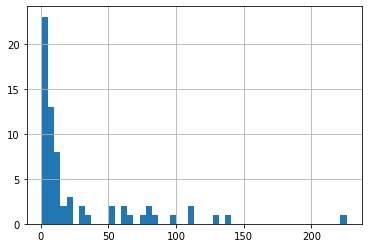

In [32]:
df_inv.groupby('department_name_en').size().hist(bins=50)
plt.show()

In [39]:
for idx, val in df_inv.groupby('department_name_en').size().sort_values(ascending=False).iteritems():
    print(idx, val)

Immigration, Refugees and Citizenship Canada 226
Public Services and Procurement Canada 137
Canada Border Services Agency 129
Innovation, Science and Economic Development Canada 111
Employment and Social Development Canada 109
Transport Canada 96
Health Canada 83
Veterans Affairs Canada 81
Agriculture and Agri-Food Canada 80
Shared Services Canada 76
Department of Indigenous Services 64
Crown-Indigenous Relations and Northern Affairs Canada 62
Canada Revenue Agency 61
Fisheries and Oceans Canada 54
Public Safety Canada 52
Global Affairs Canada 35
Environment and Climate Change Canada 32
Natural Resources Canada 32
Canadian Heritage 23
Public Service Commission of Canada 23
Statistics Canada 22
Canadian Food Inspection Agency 18
Infrastructure Canada 18
Parks Canada 14
Royal Canadian Mounted Police 14
National Research Council Canada 14
Public Health Agency of Canada 12
Privy Council Office 12
Canada Energy Regulator 11
Canadian Space Agency 10
National Defence 10
Parole Board of Canada